In [286]:
import numpy as np
import pandas as pd
import soundfile as sf
import datetime as dt
import matplotlib.pyplot as plt

from pathlib import Path

In [287]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

In [288]:
import src.subsampling as ss

In [289]:
input_dir = f'{Path.home()}/Documents/UBNA/Symposium/Recordings/SUMMER_2022/CentralPond'
summer_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20220826"
location = "Central Pond"

In [290]:
# ## Put together input parameters
# cycle_length = 360
# percent_on = 0.167
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = f"1min_every_6min__{date}_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(input_dir, cycle_length, percent_on, csv_name, output_dir, tmp_dir)

In [291]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

dets = pd.read_csv(f"../output_dir/1min_every_6min__{location.split()[0]}_{date}_030000to130000.csv")
times = np.array([0, 600])
offset = 0

In [292]:
# for i in range(len(summer_audio_files)):
#     plot_file = summer_audio_files[i].name
#     plot_dets = dets[dets['input_file']==plot_file]

#     audio_file = sf.SoundFile(summer_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in [0, 600, 1200]:
#         reftimes = np.array([0, 600]) + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)

#         ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)

#     offset += 1800

In [293]:
# ## Put together input parameters
# cycle_length = 1800
# percent_on = 1/6
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = f"5min_every_30min__{date}_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(input_dir, cycle_length, percent_on, csv_name, output_dir, tmp_dir)

In [294]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

dets2 = pd.read_csv(f"../output_dir/5min_every_30min__{location.split()[0]}_{date}_030000to130000.csv")
times = np.array([0, 600])
offset = 0

In [295]:
# for i in range(len(summer_audio_files)):
#     plot_file = summer_audio_files[i].name
#     plot_dets2 = dets2[dets2['input_file']==plot_file]

#     audio_file = sf.SoundFile(summer_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in [0, 600, 1200]:
#         reftimes = np.array([0, 600]) + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)

#         ss.plt_msds_fromdf(location, plot_file, plot_dets2, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)
    
#     offset += 1800

In [296]:
# ## Put together input parameters
# input_dir = f'{Path.home()}/Documents/UBNA/Symposium/Recordings/SUMMER_2022/CentralPond'
# cycle_length = 1800
# percent_on = 1.0
# tmp_dir = '../output/tmp/'
# output_dir = '../output_dir/'
# csv_name = f"continuous__{date}_030000to130000.csv"

# dets = ss.run_subsampling_pipeline(summer_audio_files, cycle_length, percent_on, csv_name)

In [297]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
offset = 0

In [298]:
# for i in range(len(summer_audio_files)):
#     plot_file = summer_audio_files[i].name
#     plot_c_dets = c_dets[c_dets['input_file']==plot_file]

#     audio_file = sf.SoundFile(summer_audio_files[i])
#     fs = audio_file.samplerate

#     for adjust in range(0, 1800, 30):
#         times = np.array([0, 30])
#         reftimes = times + adjust
#         audio_file.seek(reftimes[0]*fs)
#         audio_sec = audio_file.read((reftimes[1] - reftimes[0])*fs)
#         ss.plt_msds_fromdf(location, plot_file, plot_c_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on)
        
#     offset += 1800

In [299]:
times = ["030000", "033000", "040000", "043000",
         "050000", "053000", "060000", "063000",
         "070000", "073000", "080000", "083000",
         "090000", "093000", "100000", "103000",
         "110000", "113000", "120000", "123000",
         "130000"]

labels = []
for time in times:
    labels.append(f'{date}_{time}.WAV')

datetime_info = []
for label in labels:
    date_and_time = dt.datetime.strptime(label, '%Y%m%d_%H%M%S.WAV')
    datetime_info.append(dt.datetime.strftime(date_and_time, "%H:%M"))


In [300]:
num_c_dets = np.array([])
num_dets2 = np.array([])
num_dets1 = np.array([])

num_lfdets1 = np.array([])
num_lfdets2 = np.array([])
num_c_lfdets = np.array([])

num_hfdets1 = np.array([])
num_hfdets2 = np.array([])
num_c_hfdets = np.array([])

for label in labels:
    detects1 = dets[dets['input_file']==label]
    lfdetects1 = detects1[detects1["high_freq"] < 40000]
    hfdetects1 = detects1[detects1["low_freq"] > 40000]

    detects2 = dets2[dets2['input_file']==label]
    lfdetects2 = detects2[detects2["high_freq"] < 40000]
    hfdetects2 = detects2[detects2["low_freq"] > 40000]

    cdetects = c_dets[c_dets['input_file']==label]
    c_lfdetects = cdetects[cdetects["high_freq"] < 40000]
    c_hfdetects = cdetects[cdetects["low_freq"] > 40000]

    num_dets1 = np.concatenate([num_dets1, [detects1.shape[0]]])
    num_dets2 = np.concatenate([num_dets2, [detects2.shape[0]]])
    num_c_dets = np.concatenate([num_c_dets, [cdetects.shape[0]]])

    num_lfdets1 = np.concatenate([num_lfdets1, [lfdetects1.shape[0]]])
    num_lfdets2 = np.concatenate([num_lfdets2, [lfdetects2.shape[0]]])
    num_c_lfdets = np.concatenate([num_c_lfdets, [c_lfdetects.shape[0]]])

    num_hfdets1 = np.concatenate([num_hfdets1, [hfdetects1.shape[0]]])
    num_hfdets2 = np.concatenate([num_hfdets2, [hfdetects2.shape[0]]])
    num_c_hfdets = np.concatenate([num_c_hfdets, [c_hfdetects.shape[0]]])

presence_threshold = 1

presence1 = np.ones(num_dets1.shape[0])
presence1[num_dets1 < presence_threshold] = 0
lfpresence1 = np.ones(num_lfdets1.shape[0])
lfpresence1[num_lfdets1 < presence_threshold] = 0
hfpresence1 = np.ones(num_hfdets1.shape[0])
hfpresence1[num_hfdets1 < presence_threshold] = 0

presence2 = np.ones(num_dets2.shape[0])
presence2[num_dets2 < presence_threshold] = 0
lfpresence2 = np.ones(num_lfdets2.shape[0])
lfpresence2[num_lfdets2 < presence_threshold] = 0
hfpresence2 = np.ones(num_hfdets2.shape[0])
hfpresence2[num_hfdets2 < presence_threshold] = 0

c_presence = np.ones(num_c_dets.shape[0])
c_presence[num_c_dets < presence_threshold] = 0
c_lfpresence = np.ones(num_c_lfdets.shape[0])
c_lfpresence[num_c_lfdets < presence_threshold] = 0
c_hfpresence = np.ones(num_c_hfdets.shape[0])
c_hfpresence[num_c_hfdets < presence_threshold] = 0

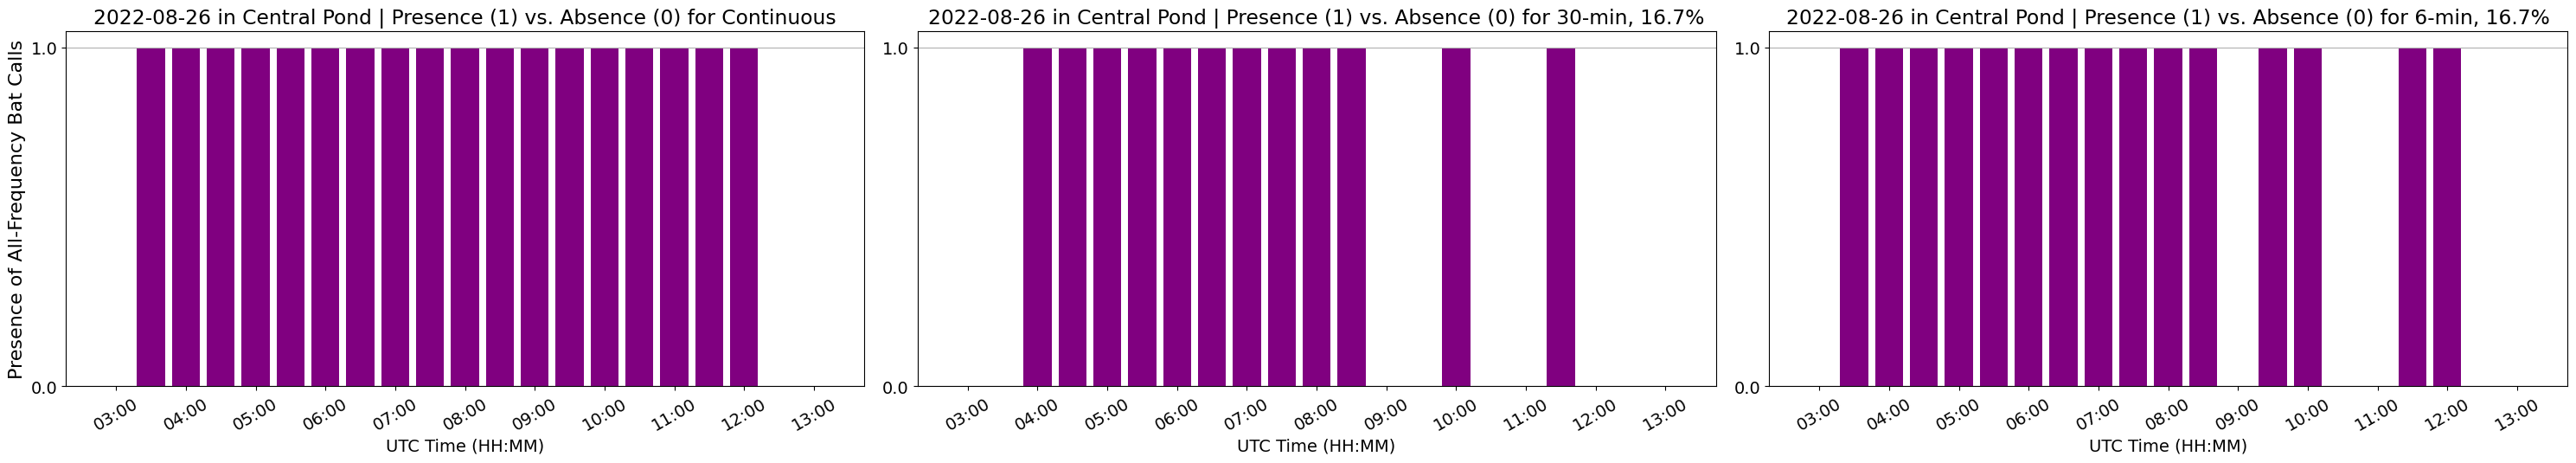

In [301]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 14})

plt.subplot(331)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_presence, color='purple')
plt.ylabel("Presence of All-Frequency Bat Calls", fontsize=16)
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(332)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, presence2, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(333)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, presence1, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_&_hf_presence_absence__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()

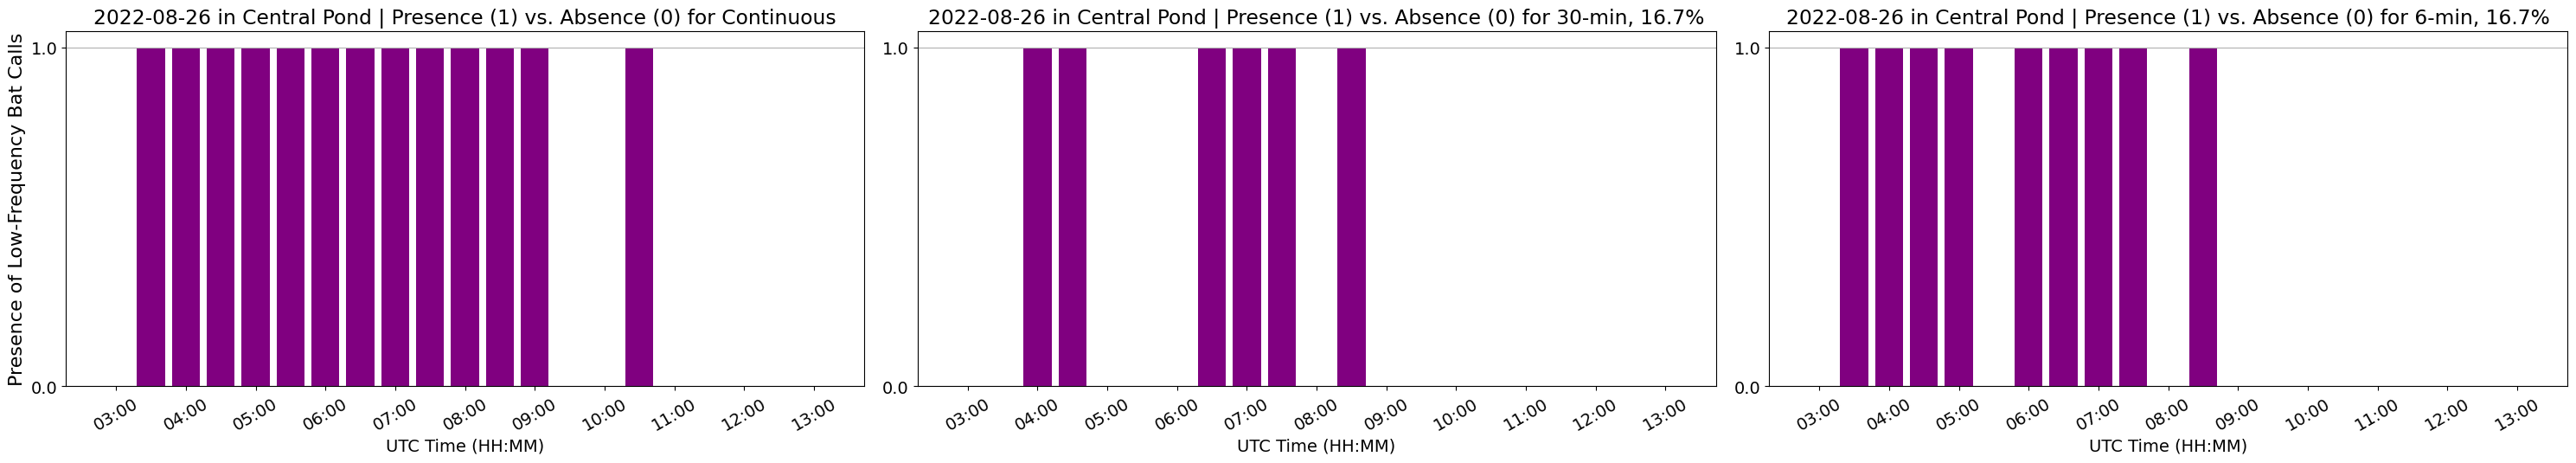

In [302]:
plt.figure(figsize=(30, 15))

plt.subplot(331)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_lfpresence, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.ylabel("Presence of Low-Frequency Bat Calls", fontsize=16)
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(332)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, lfpresence2, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(333)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, lfpresence1, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_presence_absence__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()

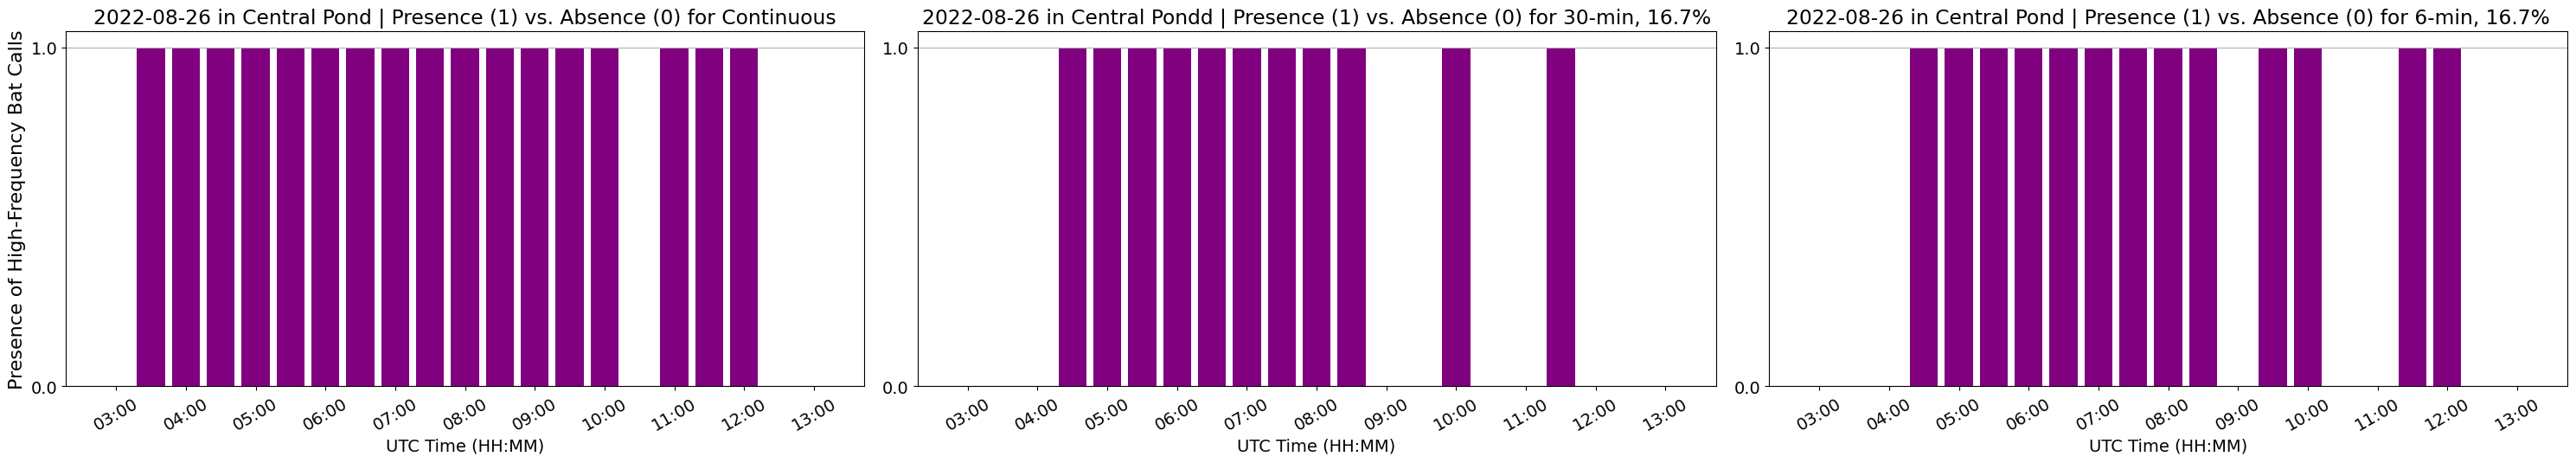

In [303]:
plt.figure(figsize=(30, 15))

plt.subplot(331)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_hfpresence, color='purple')
plt.ylabel("Presence of High-Frequency Bat Calls", fontsize=16)
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(332)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location}d | Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, hfpresence2, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.subplot(333)
plt.title(f"{(dt.datetime.strptime(date, '%Y%m%d')).date()} in {location} | Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, hfpresence1, color='purple')
plt.xlabel("UTC Time (HH:MM)")
plt.grid(axis="y")
plt.yticks(plt.yticks()[0][::5], plt.yticks()[1][::5])
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2], rotation=30)

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/hf_presence_absence__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()

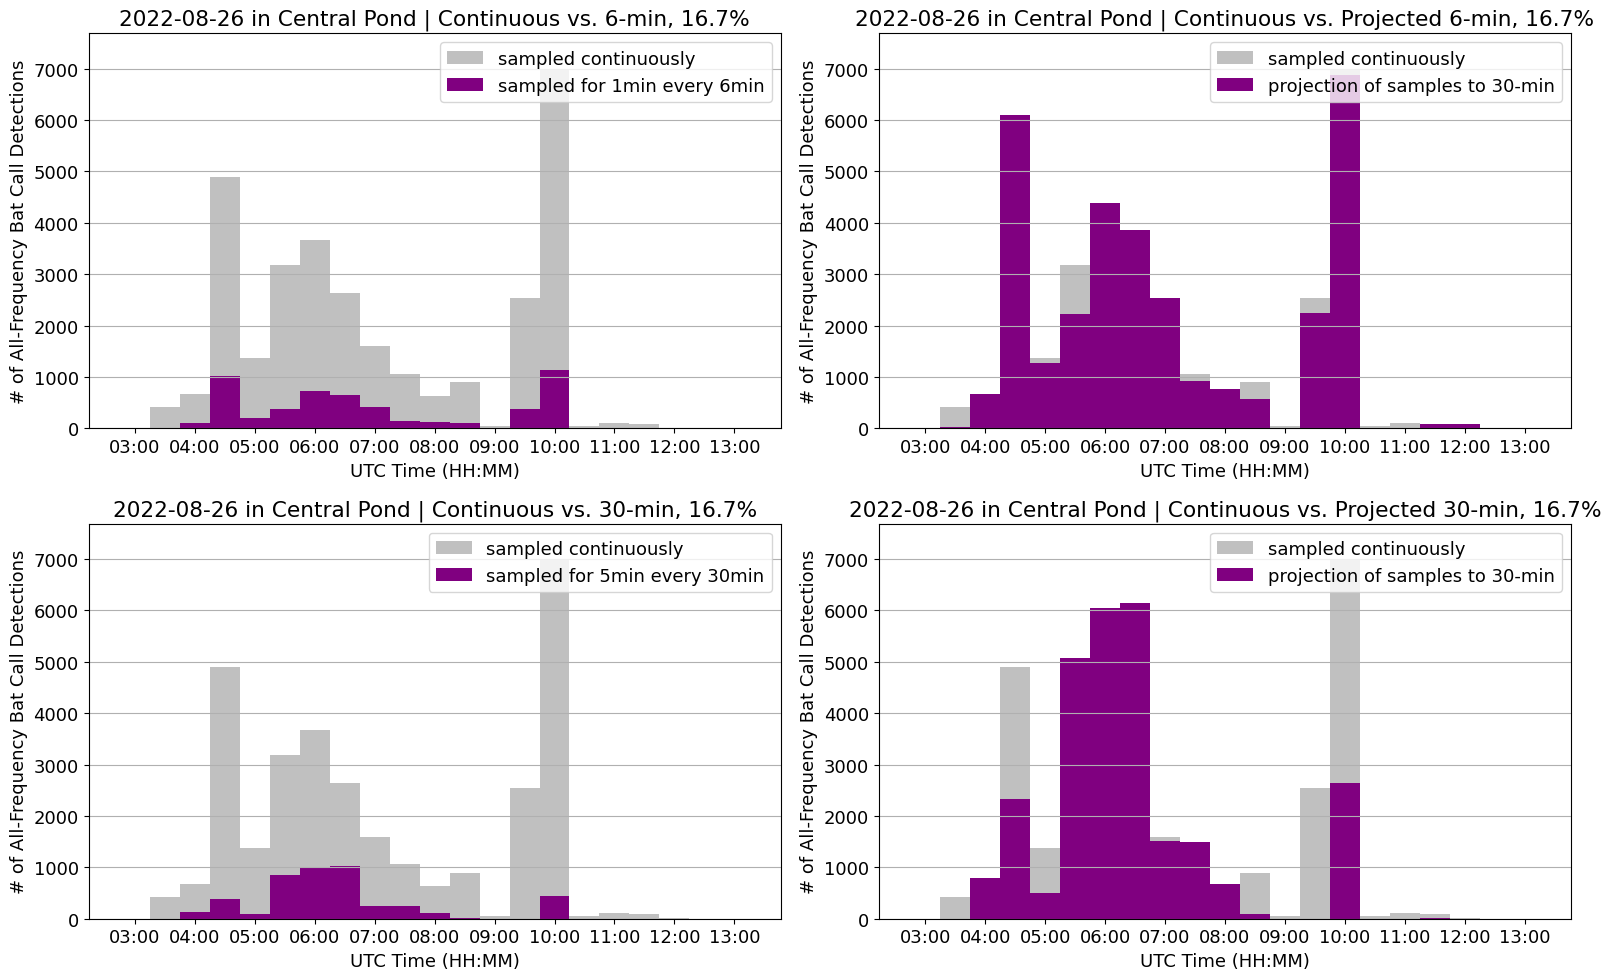

In [304]:
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(221)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_dets1, width=1, label="sampled for 1min every 6min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(222)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_dets1*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(223)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_dets2, width=1, label="sampled for 5min every 30min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(224)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of All-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_dets2*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_&_hf_detections__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()

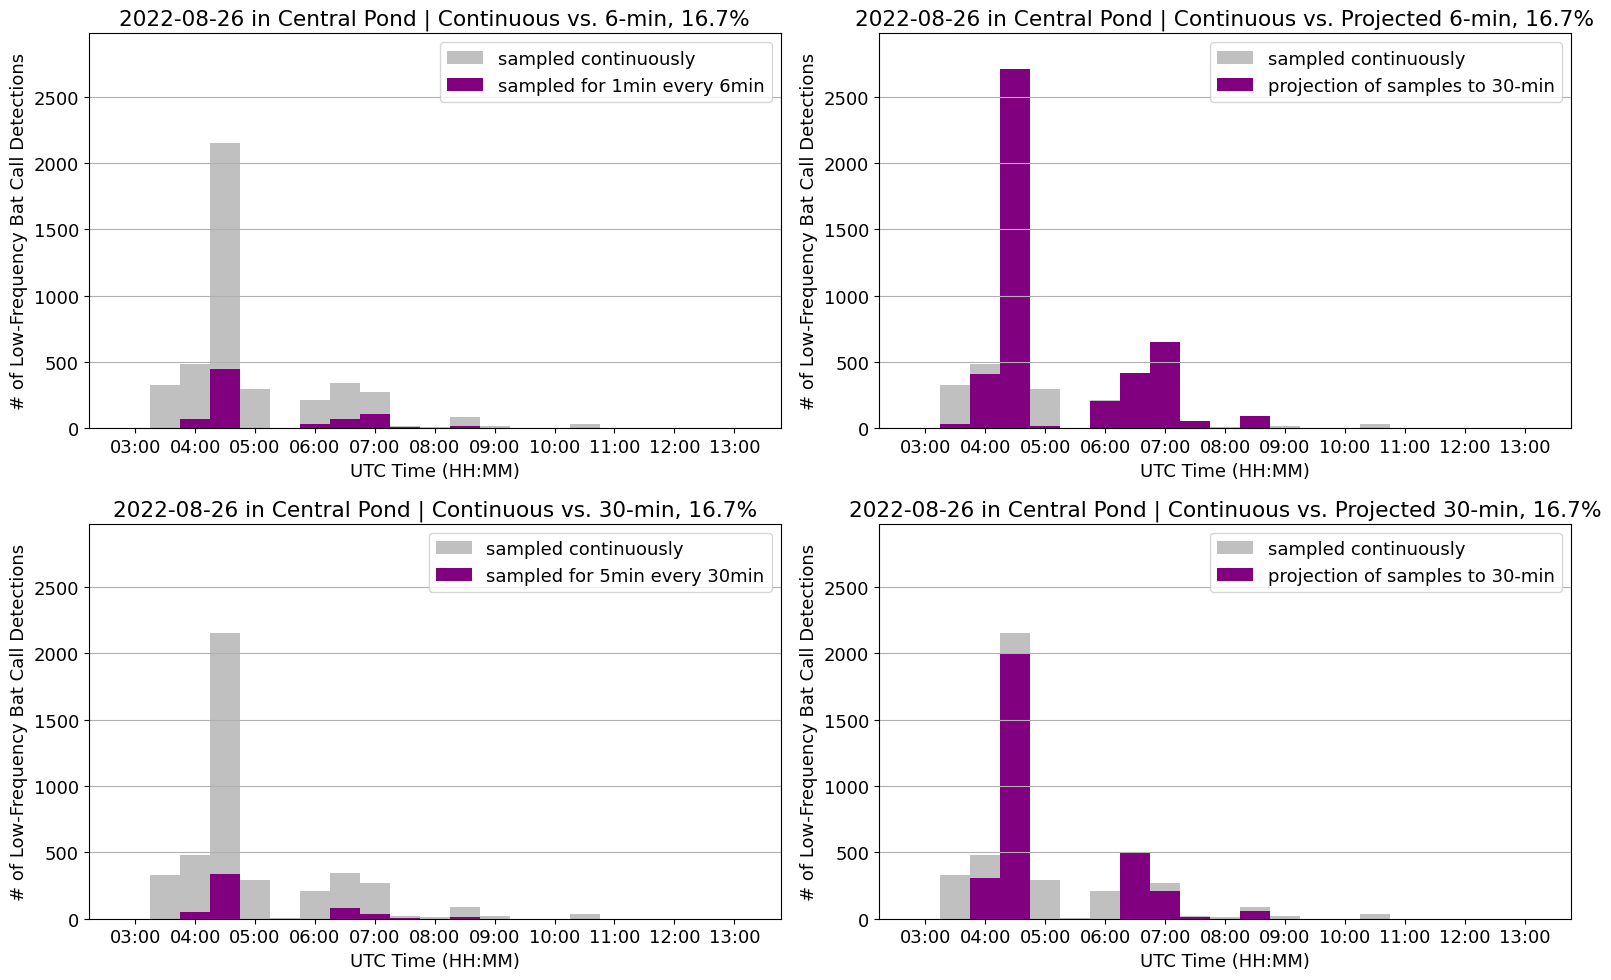

In [305]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_lfdets1, width=1, label="sampled for 1min every 6min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(222)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_lfdets1*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(223)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_lfdets2, width=1, label="sampled for 5min every 30min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(224)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of Low-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_lfdets2*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_detections__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()

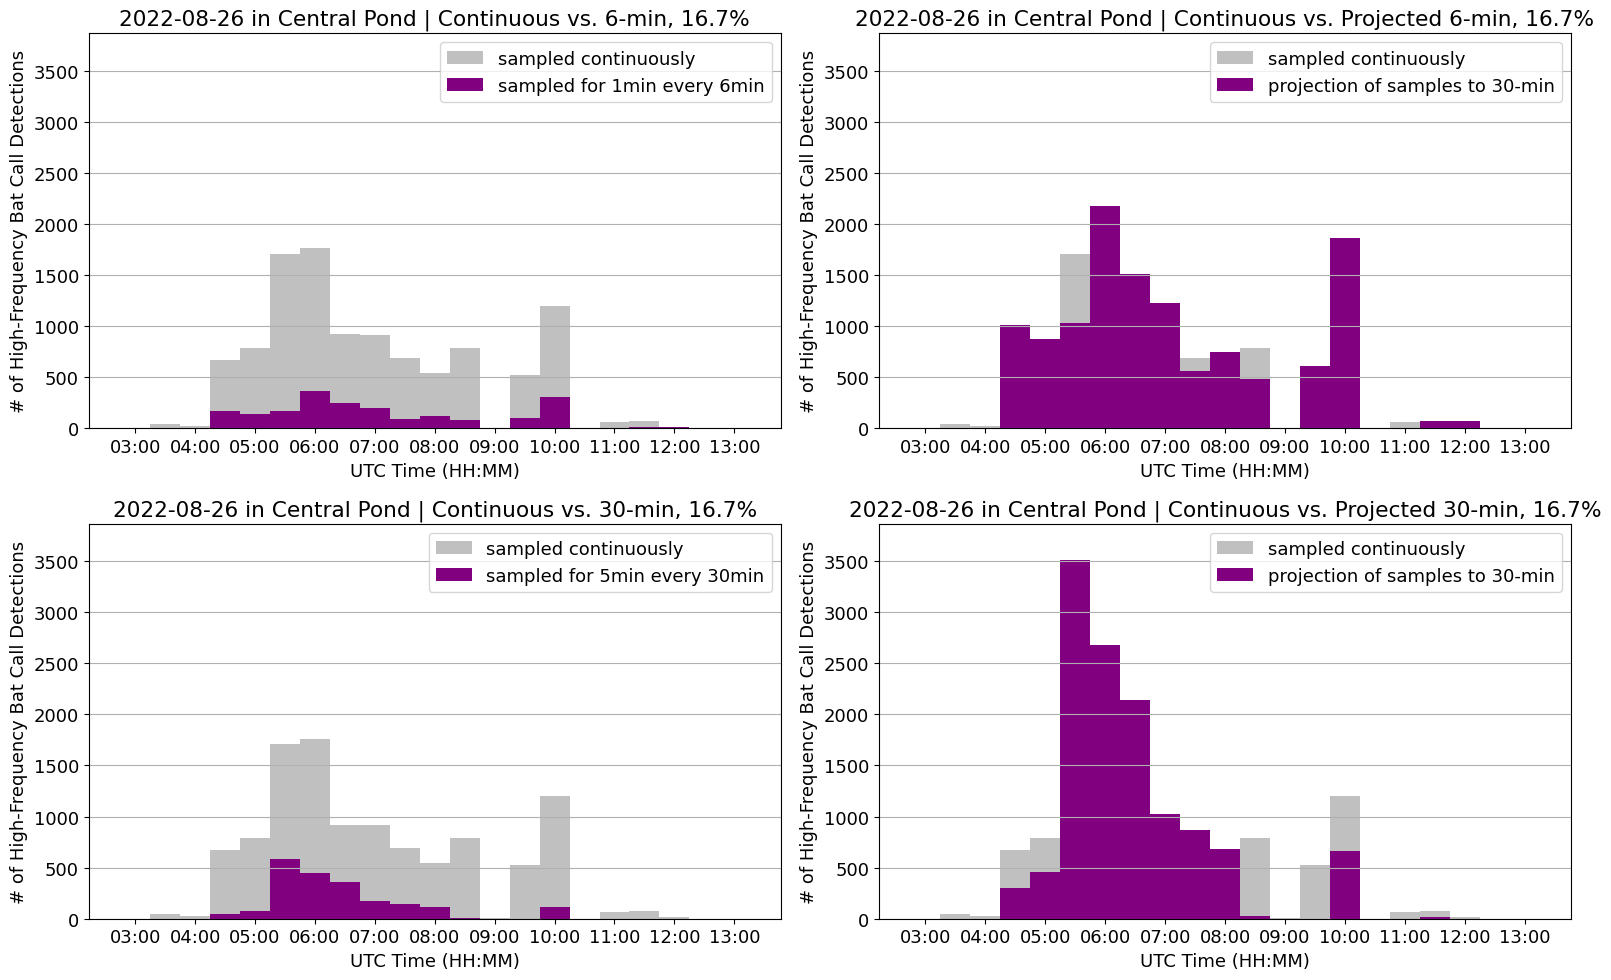

In [306]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 6-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_hfdets1, width=1, label="sampled for 1min every 6min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(222)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 6-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_hfdets1*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(223)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. 30-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_hfdets2, width=1, label="sampled for 5min every 30min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.subplot(224)
plt.title(f"{(dt.datetime.strptime(labels[0], '%Y%m%d_%H%M%S.WAV')).date()} in {location} | Continuous vs. Projected 30-min, 16.7%")
plt.ylabel("# of High-Frequency Bat Call Detections")
plt.xlabel("UTC Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color='silver')
plt.bar(datetime_info, height=num_hfdets2*6, width=1, label="projection of samples to 30-min", color='purple')
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(plt.xticks()[0][::2], plt.xticks()[1][::2])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_hf_detections__{location.split()[0]}_{date}_030000to130000_comparisons.png')
plt.show()